In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

In [34]:
df_train = pd.read_csv("../aviakompaniya_qoniqish/train_dataset.csv", index_col=0)
df_test = pd.read_csv("../aviakompaniya_qoniqish/test_dataset.csv", index_col=0)
df_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0


In [35]:
# df_train['Gender'].replace({'Female':2, 'Male':1}, inplace=True)
# df_train['Customer Type'].replace({'Loyal Customer':2, 'disloyal Customer':1}, inplace=True)
# df_train['Type of Travel'].replace({'Business travel':2, 'Personal Travel':1}, inplace=True)

In [36]:
df_add1 = pd.get_dummies(df_train[['Class', 'Gender', 'Customer Type', 'Type of Travel']], dtype='int')
df_add1 = pd.DataFrame(df_add1)
df_train = pd.concat([df_train, df_add1], axis=1)
df_train.drop(columns=['Class', 'Gender', 'Customer Type', 'Type of Travel'], inplace=True)

In [37]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())

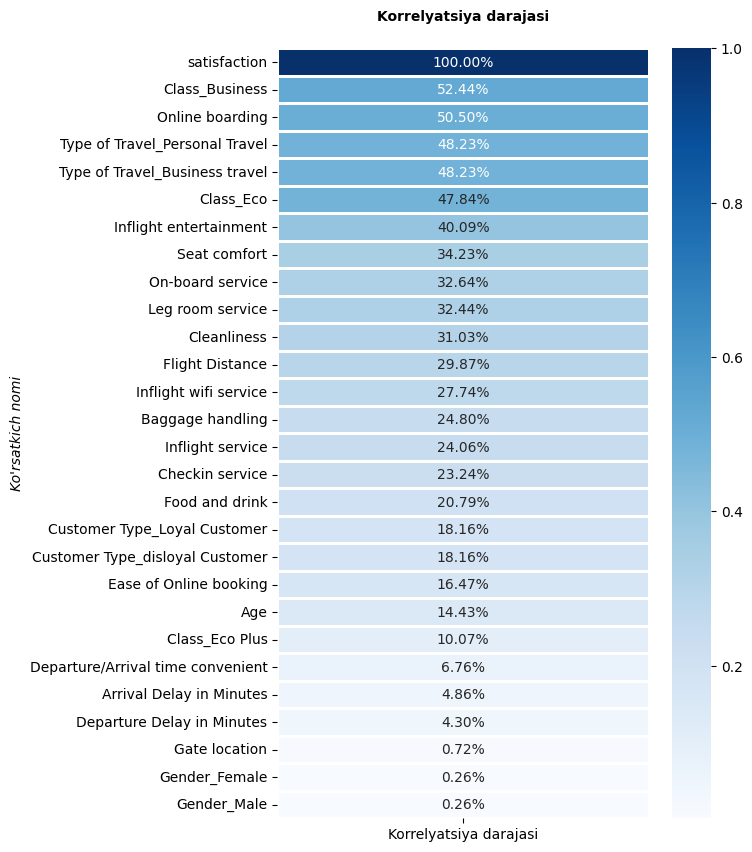

In [38]:
plt.figure(figsize=(6, 10))
sns.heatmap(data=pd.DataFrame(df_train.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False), columns=['Korrelyatsiya darajasi']),
            linewidths=1,
            cbar=True,
            cmap='Blues',
            annot=True,
            fmt=".2%")
plt.title("Korrelyatsiya darajasi",
          fontfamily='sans serif',
          fontweight='bold',
          pad=20,
          fontsize=10)
plt.ylabel("Ko'rsatkich nomi",
           fontstyle = 'italic',
           fontfamily='sans serif',
           fontsize=10,
           fontweight=1)
plt.show()

In [39]:
# df_train.drop(columns=["Inflight wifi service","Baggage handling","Inflight service","Checkin service",
#                        "Food and drink","Customer Type","Ease of Online booking","Age","Eco Plus",
#                        "Departure/Arrival time convenient","Arrival Delay in Minutes","Departure Delay in Minutes",
#                        "Gate location","Gender"], inplace=True)

In [40]:
X = df_train.drop('satisfaction', axis=1)
Y = df_train['satisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



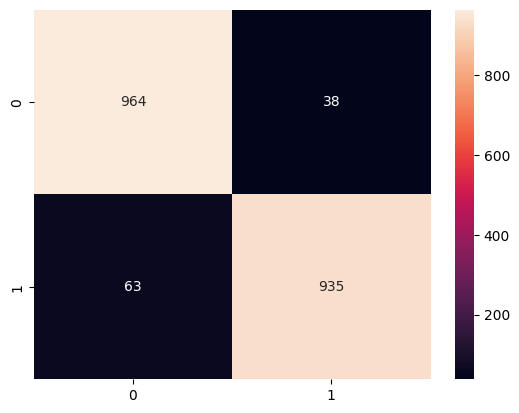

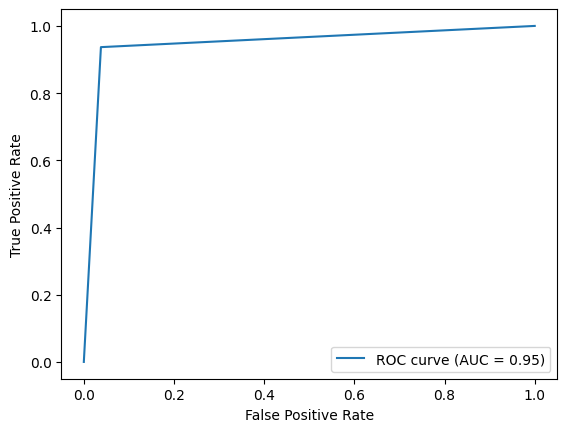

In [73]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train_scaled, Y_train)

forest_predictions = forest_model.predict(X_test_scaled)
print(metrics.classification_report(Y_test, forest_predictions))

#confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, forest_predictions)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, forest_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

d:\Programming\ML\sertifikat\venv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



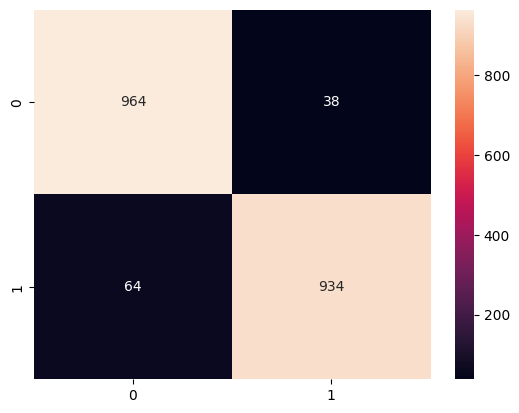

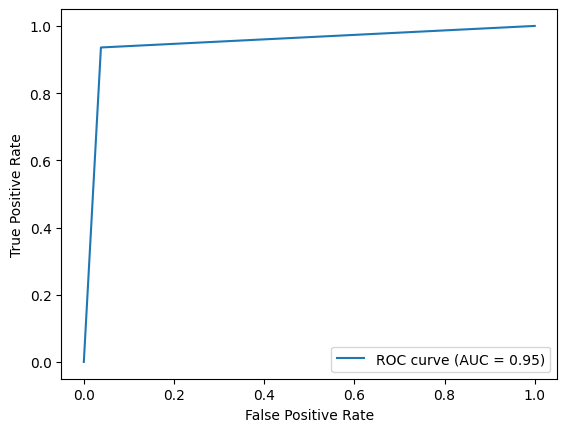

In [69]:
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=7)

xgb_model.fit(X_train_scaled, Y_train)

xgb_predictions = xgb_model.predict(X_test_scaled)
print(metrics.classification_report(Y_test, xgb_predictions))

#confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, xgb_predictions)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, xgb_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# SVM

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1002
           1       0.95      0.92      0.93       998

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



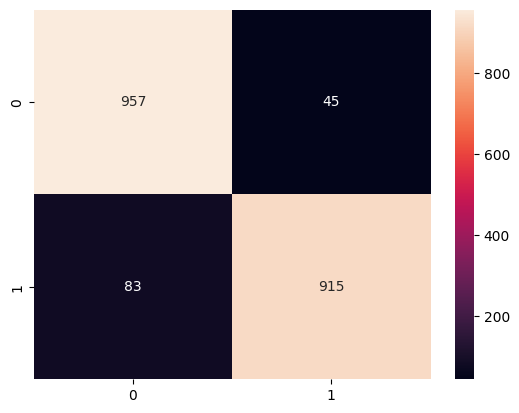

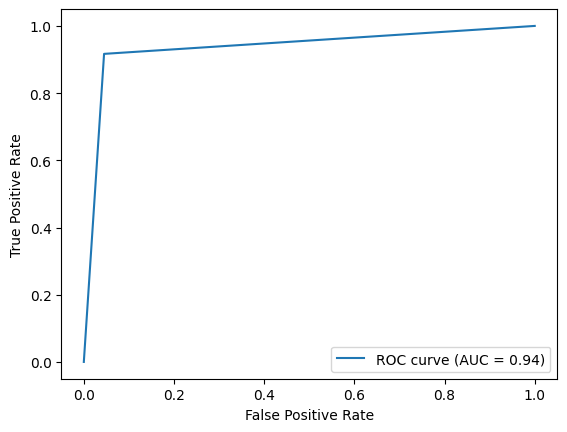

In [44]:
svm_model = SVC()
svm_model.fit(X_train_scaled, Y_train)

svm_predictions = svm_model.predict(X_test_scaled)
print(metrics.classification_report(Y_test, svm_predictions))

#confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, svm_predictions)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, svm_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# K-NN

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.95      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



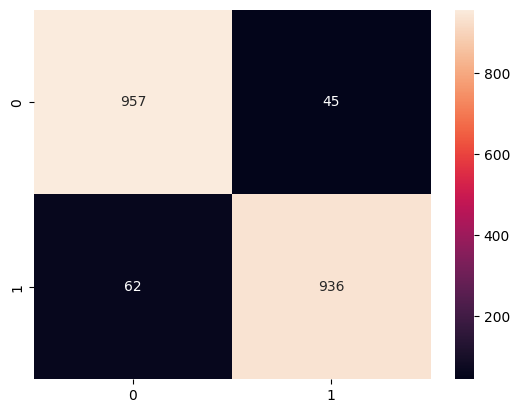

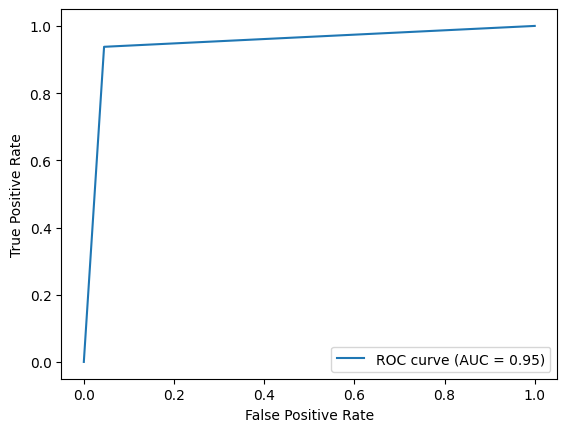

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train_scaled, Y_train)

knn_predictions = forest_model.predict(X_test_scaled)
print(metrics.classification_report(Y_test, knn_predictions))

#confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, knn_predictions)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, knn_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [46]:
param_grids = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn_model, param_grids, cv=10)
knn_gscv.fit(X_train_scaled, Y_train)

knn_gscv.best_score_, knn_gscv.best_params_

(0.9012499999999999, {'n_neighbors': 5})

In [47]:
df_add2 = pd.get_dummies(df_test[['Class', 'Gender', 'Customer Type', 'Type of Travel']], dtype='int')
df_add2 = pd.DataFrame(df_add2)
df_test = pd.concat([df_test, df_add2], axis=1)
df_test.drop(columns=['Class', 'Gender', 'Customer Type', 'Type of Travel'], inplace=True)
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean())

In [48]:
df_test = scaler.fit_transform(df_test)

In [74]:
predictions = forest_model.predict(df_test)

In [75]:
predictions = pd.DataFrame(predictions)
predictions.to_csv("../aviakompaniya_qoniqish/pred_last.csv")